In [1]:
import sys
import cv2
import re
import csv

from skimage.feature import peak_local_max

from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

sys.path.append('..')

In [20]:
%matplotlib notebook
import math as m
import numpy as np
from scipy import ndimage
from scipy.optimize import lsq_linear

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

from core import Core

from global_var import COLORS


In [22]:
folder = r'C:\SPRUP_data_Jenda\2021_04_30_Jenda_new_spri\21_05_05_test_iii/'.replace('\\', '/')

file = 'raw_02_1'

In [23]:
with open(folder + file + '.tsv', mode='r') as fid:
    file_content = fid.readlines()

stats = file_content[1].split()
video_length = len(file_content) - 1
video_width = int(stats[1])
video_height = int(stats[2])
    
with open(folder + file + '.bin', mode='rb') as fid:
    video = np.fromfile(fid, dtype=np.float64)


    video = np.reshape(video, (video_width,
                               video_height), order='F')
print(video.shape)

video = np.swapaxes(video, 0, 1)

(1936, 1216)


<IPython.core.display.Javascript object>


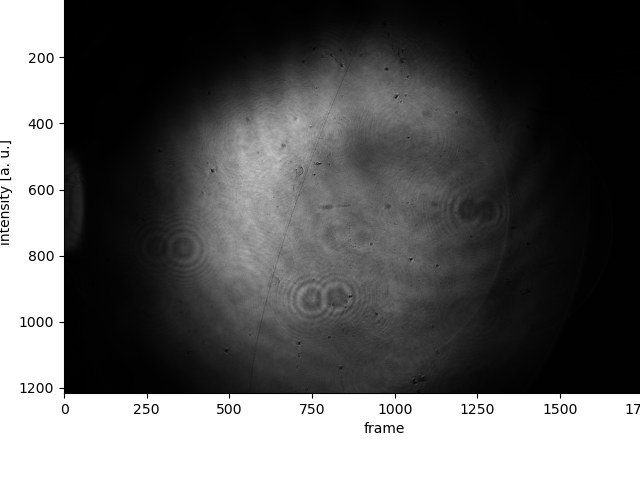

In [24]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


axes.imshow(
    video,
    cmap='gray',
    zorder=0,
)


im = Image.fromarray(video)
im.save('images/' + file + '.tif')